In [127]:
# activate env: conda activate /usr/local/Caskroom/miniconda/base/envs/MSE244

import databento as db
import numpy as np
import pandas as pd
import difflib
from collections import defaultdict
import matplotlib.pyplot as plt

## Stock

In [3]:


# Save streamed data to .dbn.zst
FIRST_MONTH_PATH = "../data/xnas-itch-20230501-20230531.ohlcv-1m.dbn.zst"
path = FIRST_MONTH_PATH

# Read saved .dbn.zst
stored_data = db.DBNStore.from_file(path)

# Convert to dataframe
df = stored_data.to_df()
# print(df.head())


                           rtype  publisher_id  instrument_id    open    high  \
ts_event                                                                        
2023-05-01 08:00:00+00:00     33             2            984  206.85  206.85   
2023-05-01 08:00:00+00:00     33             2           4862   69.79   69.79   
2023-05-01 08:00:00+00:00     33             2           6959   64.25   64.25   
2023-05-01 08:00:00+00:00     33             2           9917   17.68   17.68   
2023-05-01 08:00:00+00:00     33             2           6605  240.72  240.87   

                              low   close  volume symbol  
ts_event                                                  
2023-05-01 08:00:00+00:00  206.85  206.85       1     BA  
2023-05-01 08:00:00+00:00   69.79   69.79       1    HIG  
2023-05-01 08:00:00+00:00   64.25   64.25      21     MU  
2023-05-01 08:00:00+00:00   17.68   17.68      70      T  
2023-05-01 08:00:00+00:00  240.69  240.83     374   META  


In [11]:
# APPL
df = df[df['symbol'] == 'AAPL']
df.head(20)

,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
ts_event,,,,,,,,,
2023-05-01 08:00:00+00:00,33,2,30,169.57,169.63,169.43,169.57,434,AAPL
2023-05-01 08:01:00+00:00,33,2,30,169.55,169.56,169.36,169.36,64,AAPL
2023-05-01 08:02:00+00:00,33,2,30,169.38,169.40,169.38,169.40,25,AAPL
2023-05-01 08:03:00+00:00,33,2,30,169.39,169.50,169.39,169.50,446,AAPL
2023-05-01 08:05:00+00:00,33,2,30,169.48,169.48,169.41,169.47,321,AAPL
2023-05-01 08:06:00+00:00,33,2,30,169.34,169.34,169.28,169.28,137,AAPL
2023-05-01 08:08:00+00:00,33,2,30,169.08,169.08,169.02,169.02,958,AAPL
2023-05-01 08:09:00+00:00,33,2,30,169.04,169.04,169.04,169.04,5,AAPL
2023-05-01 08:10:00+00:00,33,2,30,169.04,169.04,169.01,169.01,281,AAPL


## Options

In [13]:
# Save streamed data to .dbn.zst
path = "../data/options/APPL/opra-pillar-20240429.ohlcv-1m.dbn.zst"

# Read saved .dbn.zst
stored_data = db.DBNStore.from_file(path)

# Convert to dataframe
df_options = stored_data.to_df()

In [14]:
df_options["avg_price"]
df_options

,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
ts_event,,,,,,,,,
2024-04-29 13:30:00+00:00,33,24,11038,1.36,1.36,1.31,1.31,2,AAPL 240503P00167500
2024-04-29 13:30:00+00:00,33,25,11038,1.47,1.47,1.33,1.33,8,AAPL 240503P00167500
2024-04-29 13:30:00+00:00,33,28,11038,1.38,1.39,1.36,1.39,12,AAPL 240503P00167500
2024-04-29 13:30:00+00:00,33,32,10976,1.54,1.54,1.54,1.54,15,AAPL 240531C00185000
2024-04-29 13:30:00+00:00,33,28,10976,1.47,1.47,1.47,1.47,1,AAPL 240531C00185000
...,...,...,...,...,...,...,...,...,...
2024-04-29 19:59:00+00:00,33,22,4064,13.69,13.69,13.69,13.69,5,AAPL 250117C00180000
2024-04-29 19:59:00+00:00,33,32,932,0.24,0.24,0.24,0.24,2,AAPL 240531P00145000
2024-04-29 19:59:00+00:00,33,25,16785009,17.20,17.20,17.20,17.20,5,AAPL 240920C00165000


In [23]:
df_options.loc["2024-04-29 13:30:00+00:00"]

,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
ts_event,,,,,,,,,
2024-04-29 13:30:00+00:00,33,24,11038,1.36,1.36,1.31,1.31,2,AAPL 240503P00167500
2024-04-29 13:30:00+00:00,33,25,11038,1.47,1.47,1.33,1.33,8,AAPL 240503P00167500
2024-04-29 13:30:00+00:00,33,28,11038,1.38,1.39,1.36,1.39,12,AAPL 240503P00167500
2024-04-29 13:30:00+00:00,33,32,10976,1.54,1.54,1.54,1.54,15,AAPL 240531C00185000
2024-04-29 13:30:00+00:00,33,28,10976,1.47,1.47,1.47,1.47,1,AAPL 240531C00185000
...,...,...,...,...,...,...,...,...,...
2024-04-29 13:30:00+00:00,33,34,65,6.00,6.00,6.00,6.00,1,AAPL 250117C00200000
2024-04-29 13:30:00+00:00,33,23,56,0.54,0.54,0.54,0.54,20,AAPL 250117C00250000
2024-04-29 13:30:00+00:00,33,32,16777335,25.72,25.72,25.72,25.72,1,AAPL 260116C00180000


In [18]:
# Group the DataFrame by 'ts_event' and 'symbol'
grouped = df_options.groupby(['ts_event', 'symbol'])

# Create a new DataFrame with the merged columns as lists
merged_df = grouped.agg(list).reset_index()

# set index to ts_event
merged_df.set_index('ts_event', inplace=True)

# sort by index then symbol
merged_df.sort_values(by=['ts_event', 'symbol'], inplace=True)

merged_df

,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume
ts_event,,,,,,,,,
2024-04-29 13:30:00+00:00,AAPL 240503C00147000,[33],[35],[2992],[26.59],[26.59],[26.59],[26.59],[1]
2024-04-29 13:30:00+00:00,AAPL 240503C00155000,"[33, 33, 33]","[29, 26, 28]","[6844, 6844, 6844]","[18.5, 18.5, 18.5]","[18.5, 18.5, 18.5]","[18.5, 18.5, 18.5]","[18.5, 18.5, 18.5]","[2, 1, 1]"
2024-04-29 13:30:00+00:00,AAPL 240503C00157500,[33],[32],[9016],[16.1],[16.1],[16.1],[16.1],[2]
2024-04-29 13:30:00+00:00,AAPL 240503C00160000,"[33, 33, 33, 33, 33, 33]","[27, 22, 26, 35, 25, 28]","[4776, 4776, 4776, 4776, 4776, 4776]","[13.78, 13.78, 13.5, 13.91, 13.6, 13.78]","[13.78, 13.78, 13.78, 13.91, 13.65, 13.78]","[13.78, 13.78, 13.5, 13.91, 13.6, 13.78]","[13.78, 13.78, 13.78, 13.91, 13.65, 13.78]","[1, 1, 3, 5, 2, 1]"
2024-04-29 13:30:00+00:00,AAPL 240503C00162500,[33],[35],[2938],[11.55],[11.55],[11.55],[11.55],[4]
...,...,...,...,...,...,...,...,...,...
2024-04-29 19:59:00+00:00,AAPL 250117P00145000,[33],[22],[6079],[3.35],[3.35],[3.35],[3.35],[2]
2024-04-29 19:59:00+00:00,AAPL 250117P00150000,[33],[29],[8119],[4.3],[4.3],[4.3],[4.3],[2]
2024-04-29 19:59:00+00:00,AAPL 260116C00300000,"[33, 33, 33, 33]","[24, 27, 28, 26]","[16778902, 16778902, 16778902, 16778902]","[1.68, 1.68, 1.68, 1.68]","[1.68, 1.68, 1.68, 1.68]","[1.68, 1.68, 1.68, 1.68]","[1.68, 1.68, 1.68, 1.68]","[1, 1, 1, 1]"


In [26]:
# Average accross different sources for the same option at the same time

# Create new columns for the averages
merged_df['avg_open'] = merged_df['open'].apply(lambda x: np.mean(x))
merged_df['avg_high'] = merged_df['high'].apply(lambda x: np.mean(x))
merged_df['avg_low'] = merged_df['low'].apply(lambda x: np.mean(x))
merged_df['avg_close'] = merged_df['close'].apply(lambda x: np.mean(x))
merged_df['avg_volume'] = merged_df['volume'].apply(lambda x: np.mean(x))

merged_df

,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:30:00+00:00,AAPL 240503C00147000,[33],[35],[2992],[26.59],[26.59],[26.59],[26.59],[1],26.590,26.59,26.590,26.59,1.000000
2024-04-29 13:30:00+00:00,AAPL 240503C00155000,"[33, 33, 33]","[29, 26, 28]","[6844, 6844, 6844]","[18.5, 18.5, 18.5]","[18.5, 18.5, 18.5]","[18.5, 18.5, 18.5]","[18.5, 18.5, 18.5]","[2, 1, 1]",18.500,18.50,18.500,18.50,1.333333
2024-04-29 13:30:00+00:00,AAPL 240503C00157500,[33],[32],[9016],[16.1],[16.1],[16.1],[16.1],[2],16.100,16.10,16.100,16.10,2.000000
2024-04-29 13:30:00+00:00,AAPL 240503C00160000,"[33, 33, 33, 33, 33, 33]","[27, 22, 26, 35, 25, 28]","[4776, 4776, 4776, 4776, 4776, 4776]","[13.78, 13.78, 13.5, 13.91, 13.6, 13.78]","[13.78, 13.78, 13.78, 13.91, 13.65, 13.78]","[13.78, 13.78, 13.5, 13.91, 13.6, 13.78]","[13.78, 13.78, 13.78, 13.91, 13.65, 13.78]","[1, 1, 3, 5, 2, 1]",13.725,13.78,13.725,13.78,2.166667
2024-04-29 13:30:00+00:00,AAPL 240503C00162500,[33],[35],[2938],[11.55],[11.55],[11.55],[11.55],[4],11.550,11.55,11.550,11.55,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-29 19:59:00+00:00,AAPL 250117P00145000,[33],[22],[6079],[3.35],[3.35],[3.35],[3.35],[2],3.350,3.35,3.350,3.35,2.000000
2024-04-29 19:59:00+00:00,AAPL 250117P00150000,[33],[29],[8119],[4.3],[4.3],[4.3],[4.3],[2],4.300,4.30,4.300,4.30,2.000000
2024-04-29 19:59:00+00:00,AAPL 260116C00300000,"[33, 33, 33, 33]","[24, 27, 28, 26]","[16778902, 16778902, 16778902, 16778902]","[1.68, 1.68, 1.68, 1.68]","[1.68, 1.68, 1.68, 1.68]","[1.68, 1.68, 1.68, 1.68]","[1.68, 1.68, 1.68, 1.68]","[1, 1, 1, 1]",1.680,1.68,1.680,1.68,1.000000


In [99]:
def get_closest_option_prefix(stock_ticker, delta, current_time): # delta measured in days
    # current_time: e.g. 2024-04-29 13:30:00+00:00
    # delta: e.g. 30

    # get the date in the future
    future_date = current_time + pd.DateOffset(days=delta)

    # Convert future date to format YYMMDD
    future_date_str = future_date.strftime('%y%m%d')

    # pad up to 6 characters
    stock_ticker = stock_ticker.ljust(6)

    return f"{stock_ticker}{future_date_str}"

get_closest_option_prefix("AAPL", 30, pd.Timestamp("2024-04-29 13:30:00+00:00"))

'AAPL  240529'

In [75]:
def find_index(prefix, ids):
    # Binary search to find the insertion index

    left, right = 0, len(ids)
    while left < right:
        mid = (left + right) // 2
        if ids[mid] < prefix:
            left = mid + 1
        else:
            right = mid

    return left

def select_closest_option(df_at_time, stock_ticker, delta, current_time, option_type="C"): # option_type: C for call, P for put

    # get the closest option name
    closest_option_prefix = get_closest_option_prefix(stock_ticker, delta, current_time)

    # options available at time t
    options_at_time = df_at_time["symbol"].values

    # Restrict to options of the desired type
    #  - 8 characters before the end of the string is the ID (P/C)
    # print(options_at_time[0][-9])
    options_at_time = [option for option in options_at_time if option[-9] == option_type]

    closest_indx = find_index(closest_option_prefix, options_at_time)

    # get options within radius of index
    radius = 0
    closest_options = options_at_time[closest_indx - radius : closest_indx + radius + 1]

    return closest_options

select_closest_option(merged_df, "AAPL", 30, pd.Timestamp("2024-04-29 13:30:00+00:00"), option_type="C")

['AAPL  240531C00165000']

In [148]:
time_stamps = merged_df.index.unique()


portfolio = {} #defaultdict({})


i = 0
for time_stamp in time_stamps:
    i += 1

    # restrict to rows at the current timestamp
    df_at_time = merged_df.loc[time_stamp]

    closest_option = select_closest_option(df_at_time, "AAPL", 30, time_stamp, option_type="C")[0]

    # get the average price of the closest option
    closest_option_row = df_at_time[ df_at_time["symbol"] == closest_option ]
    display(closest_option_row)

    # get the average price
    avg_open, avg_close = closest_option_row["avg_open"].values[0], closest_option_row["avg_close"].values[0]
    print(avg_open, avg_close)

    # flip a coin
    if np.random.rand() > 0.5: continue

    # buy the option
    if closest_option not in portfolio:
        portfolio[closest_option] = {
            "buy_prices": [],
            "buy_times": [],
        }

    portfolio[closest_option]["buy_prices"].append(avg_close)
    portfolio[closest_option]["buy_times"].append(time_stamp)
    

    if i > 10:
        break

print("portfolio")
print(portfolio)

def extract_option_data(id):
    # id: e.g. "AAPL  240529C00250000"
    stock_ticker = id[:6].strip()
    expiration_date = id[6:12]
    option_type = id[12]
    strike_price = id[13:]

    # convert expiration data of YYMMDD to YYYY-MM-DD
    expiration_date = pd.to_datetime(expiration_date, format='%y%m%d')

    # convert strike price to float
    strike_price = float(strike_price) / 1000

    return stock_ticker, expiration_date, option_type, strike_price

def track_option_value(option_rows):
    # option_rows: rows of the option at different timestamps

    # calculate the value of the option at each timestamp
    # option_values = np.zeros(len(option_rows))
    option_updates = {

    } # times to prices

    for i in range(len(option_rows)):
        row = option_rows.iloc[i]
        index = option_rows.index[i]
        # print(index)
        avg_open, avg_close = row["avg_open"], row["avg_close"]

        # calculate the value of the option
        # option_values[i] = avg_close
        option_updates[index] = avg_close

    # print("option_updates")
    # print(option_updates)

    # option_values = np.zeros(len(option_rows))
    option_values = pd.Series(0, index=time_stamps)
    for i in range(len(time_stamps)):
        time_stamp = time_stamps[i]
        if time_stamp in option_updates:
            option_values.iloc[i] = option_updates[time_stamp]
            # print(option_updates[time_stamp])
        else:
            option_values.iloc[i] = option_values.iloc[i-1]

    return option_values

def calculate_balance(portfolio):
    # array of 0's with the same length as the number of options in the portfolio
    # balances = np.zeros(len(time_stamps))
    positions = pd.Series(0, index=time_stamps)

    # cash
    # cash_balance = 1000
    desired_position_size = 100
    cash = pd.Series(1000, index=time_stamps)
    # cash.iloc[0] = cash_balance

    # portfolio: dictionary with keys as option tickers and the number held as values
    for option in portfolio:
        buy_prices = portfolio[option]["buy_prices"]
        buy_times = portfolio[option]["buy_times"]

        # get rows which match the option
        option_rows = merged_df[ merged_df["symbol"] == option ]

        # restrict to rows with ts_event past buy_times[0]
        # option_rows = option_rows[ option_rows.index > buy_times[0] ]

        # calculate the value of the option at each timestamp
        option_values = track_option_value(option_rows)

        # print("OPTIONS VALEIS")
        # display(option_values)

        for i in range(len(buy_prices)):
            buy_price, buy_time = buy_prices[i], buy_times[i]

            # restrict to rows with ts_event past buy_time
            option_values_restricted = option_values[ option_values.index > buy_time ]

            # merge with positions
            # positions = positions.add(option_values_restricted - buy_price, fill_value=0)

            # choose integer qty so the position is closest to desired_position_size
            position_size = int(desired_position_size / buy_price)

            positions = positions.add(option_values_restricted * position_size, fill_value=0)

            cash_restricted = pd.Series(buy_price * position_size, index= option_values.index[option_values.index > buy_time])
            cash = cash.sub(cash_restricted, fill_value=0)

    return positions, cash

positions, cash = calculate_balance(portfolio)
# print("balances")
display(positions)
display(cash)

# extract_option_data("SPY   231117P00486000")

# zero's at start as converts cash into stock, best estimate for price is what we bought it for

# time_stamps

,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:30:00+00:00,AAPL 240531C00165000,"[33, 33]","[27, 25]","[10990, 10990]","[11.0, 10.9]","[11.0, 10.9]","[11.0, 10.9]","[11.0, 10.9]","[1, 1]",10.95,10.95,10.95,10.95,1.0


10.95 10.95


,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:31:00+00:00,AAPL 240531C00155000,[33],[35],[6880],[20.0],[20.0],[20.0],[20.0],[15],20.0,20.0,20.0,20.0,15.0


20.0 20.0


,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:32:00+00:00,AAPL 240531C00170000,"[33, 33, 33, 33, 33]","[31, 36, 32, 20, 29]","[10994, 10994, 10994, 10994, 10994]","[8.0, 7.73, 8.0, 7.7, 8.0]","[8.0, 7.73, 8.0, 7.7, 8.0]","[8.0, 7.73, 8.0, 7.7, 8.0]","[8.0, 7.73, 8.0, 7.7, 8.0]","[4, 1, 4, 1, 5]",7.886,7.886,7.886,7.886,3.0


7.886 7.886


,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:33:00+00:00,AAPL 240531C00155000,[33],[37],[6880],[20.2],[20.2],[20.2],[20.2],[1],20.2,20.2,20.2,20.2,1.0


20.2 20.2


,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:34:00+00:00,AAPL 240531C00160000,[33],[24],[8970],[16.2],[16.2],[16.2],[16.2],[1],16.2,16.2,16.2,16.2,1.0


16.2 16.2


,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:35:00+00:00,AAPL 240531C00170000,[33],[22],[10994],[8.42],[8.42],[8.42],[8.42],[1],8.42,8.42,8.42,8.42,1.0


8.42 8.42


,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:36:00+00:00,AAPL 240531C00160000,[33],[32],[8970],[16.55],[16.55],[16.55],[16.55],[1],16.55,16.55,16.55,16.55,1.0


16.55 16.55


,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:37:00+00:00,AAPL 240531C00170000,"[33, 33, 33, 33, 33, 33, 33]","[31, 28, 23, 24, 29, 35, 36]","[10994, 10994, 10994, 10994, 10994, 10994, 10994]","[9.0, 8.86, 8.8, 8.75, 9.0, 8.81, 8.97]","[9.0, 8.86, 8.8, 8.75, 9.0, 8.81, 8.97]","[9.0, 8.86, 8.8, 8.75, 9.0, 8.81, 8.97]","[9.0, 8.86, 8.8, 8.75, 9.0, 8.81, 8.97]","[1, 1, 6, 1, 5, 10, 1]",8.884286,8.884286,8.884286,8.884286,3.571429


8.884285714285713 8.884285714285713


,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:38:00+00:00,AAPL 240531C00165000,[33],[21],[10990],[12.65],[12.65],[12.65],[12.65],[1],12.65,12.65,12.65,12.65,1.0


12.65 12.65


,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:39:00+00:00,AAPL 240531C00170000,"[33, 33, 33]","[29, 20, 34]","[10994, 10994, 10994]","[8.95, 8.85, 8.83]","[8.95, 8.85, 8.83]","[8.95, 8.85, 8.83]","[8.95, 8.85, 8.83]","[1, 1, 1]",8.876667,8.876667,8.876667,8.876667,1.0


8.876666666666665 8.876666666666665


,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:40:00+00:00,AAPL 240531C00170000,"[33, 33]","[32, 20]","[10994, 10994]","[8.8, 8.85]","[8.8, 8.85]","[8.8, 8.85]","[8.8, 8.85]","[20, 1]",8.825,8.825,8.825,8.825,10.5


8.825 8.825


,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:41:00+00:00,AAPL 240531C00165000,"[33, 33, 33, 33]","[29, 34, 23, 24]","[10990, 10990, 10990, 10990]","[12.67, 12.67, 12.68, 12.67]","[12.67, 12.67, 12.68, 12.67]","[12.67, 12.67, 12.68, 12.67]","[12.67, 12.67, 12.68, 12.67]","[1, 1, 1, 2]",12.6725,12.6725,12.6725,12.6725,1.25


12.6725 12.6725


,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-29 13:42:00+00:00,AAPL 240531C00165000,[33],[34],[10990],[12.68],[12.68],[12.68],[12.68],[1],12.68,12.68,12.68,12.68,1.0


12.68 12.68
portfolio
{'AAPL  240531C00165000': {'buy_prices': [10.95, 12.68], 'buy_times': [Timestamp('2024-04-29 13:30:00+0000', tz='UTC'), Timestamp('2024-04-29 13:42:00+0000', tz='UTC')]}, 'AAPL  240531C00155000': {'buy_prices': [20.0, 20.2], 'buy_times': [Timestamp('2024-04-29 13:31:00+0000', tz='UTC'), Timestamp('2024-04-29 13:33:00+0000', tz='UTC')]}, 'AAPL  240531C00160000': {'buy_prices': [16.2, 16.55], 'buy_times': [Timestamp('2024-04-29 13:34:00+0000', tz='UTC'), Timestamp('2024-04-29 13:36:00+0000', tz='UTC')]}, 'AAPL  240531C00170000': {'buy_prices': [8.42], 'buy_times': [Timestamp('2024-04-29 13:35:00+0000', tz='UTC')]}}


/var/folders/h6/sy6yc4qn7vg_qrvftw3gqnl00000gn/T/ipykernel_96655/3750447260.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.95' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  option_values.iloc[i] = option_updates[time_stamp]
/var/folders/h6/sy6yc4qn7vg_qrvftw3gqnl00000gn/T/ipykernel_96655/3750447260.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  option_values.iloc[i] = option_updates[time_stamp]
/var/folders/h6/sy6yc4qn7vg_qrvftw3gqnl00000gn/T/ipykernel_96655/3750447260.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15.35' has dtype incompatible with int64, please explicitly cast to a c

ts_event
2024-04-29 13:30:00+00:00      0.00
2024-04-29 13:31:00+00:00     98.55
2024-04-29 13:32:00+00:00    198.55
2024-04-29 13:33:00+00:00    207.65
2024-04-29 13:34:00+00:00    286.65
                              ...  
2024-04-29 19:55:00+00:00    639.36
2024-04-29 19:56:00+00:00    639.36
2024-04-29 19:57:00+00:00    638.26
2024-04-29 19:58:00+00:00    631.06
2024-04-29 19:59:00+00:00    631.06
Length: 390, dtype: float64

ts_event
2024-04-29 13:30:00+00:00    1000.00
2024-04-29 13:31:00+00:00     901.45
2024-04-29 13:32:00+00:00     801.45
2024-04-29 13:33:00+00:00     801.45
2024-04-29 13:34:00+00:00     720.65
                              ...   
2024-04-29 19:55:00+00:00     342.77
2024-04-29 19:56:00+00:00     342.77
2024-04-29 19:57:00+00:00     342.77
2024-04-29 19:58:00+00:00     342.77
2024-04-29 19:59:00+00:00     342.77
Length: 390, dtype: float64

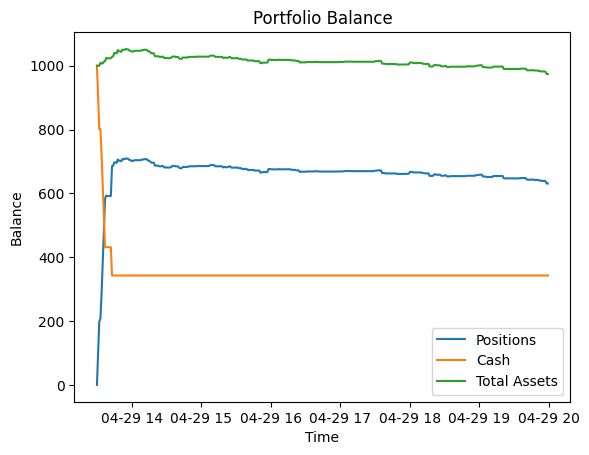

In [149]:
def plot_portfolio(portfolio, positions, cash):
    # plot the balances of the portfolio

    # plot the balances
    plt.plot(time_stamps, positions)
    plt.plot(time_stamps, cash)

    # Total assets
    total_assets = positions + cash

    plt.plot(time_stamps, total_assets)
    plt.xlabel("Time")
    plt.ylabel("Balance")
    plt.title("Portfolio Balance")
    plt.legend(["Positions", "Cash", "Total Assets"])
    plt.show()

plot_portfolio(portfolio, positions, cash)